# Feature Engineering: Variables de texto
-----

## Introducción

Hasta ahora, hemos visto variables numéricas, numéricas categóricas, temporales... Incluso hemos visto variables de texto con muy pocas palabras y que hacían referencia a una categoría, por lo que las hemos tratado como categóricas. Sin embargo, las variables de texto no siempre siguen esta estructura, algunas veces pueden ser mucho más ricas, pudiendo llegar a contener significado propio más allá de una categoría. Podemos llegar a tener párrafos completos de texto que nos transmitan múltiples ideas.

Por ejemplo, podemos llegar a tener cosas como esta:

    Emma knocked on the door. No answer. She knocked again and waited. There was a large maple tree next to the house. Emma looked up the tree and saw a giant raven perched at the treetop. Under the afternoon sun, the raven gleamed magnificently. Its beak was hard and pointed, its claws sharp and strong. It looked regal and imposing. It reigned the tree it stood on. The raven was looking straight at Emma with its beady black eyes. Emma felt slightly intimidated. She took a step back from the door and tentatively said, “Hello?”
    
El párrafo contiene mucha información. Sabemos que se trata de una persona llamada Emma y un cuervo. Hay una casa y un árbol, y Emma está tratando de entrar en la casa, pero en su lugar ve al cuervo. El cuervo es magnífico y se ha dado cuenta de la presencia de Emma, que está un poco asustada pero está intentando comunicarse.

Entonces, ¿qué partes de este bloque de información son las características destacadas que debemos extraer? Para empezar, parece una buena idea extraer los nombres de los personajes principales, Emma y el cuervo. A continuación, también puede ser bueno anotar que el escenario donde se produce el encuentro es en el recibidor de una casa, siendo los elementos más relevantes una puerta y un árbol. ¿Y qué hay de las descripciones del cuervo? ¿Qué hay de las acciones de Emma (llamar a la puerta, dar un paso atrás y saludar)?

Este capítulo presenta los conceptos básicos del Feature Engineering para texto. Comenzaremos con el _bag of words_, que es la representación más simple basada en estadísticas de conteo de palabras. Una transformación relacionada muy utilizada es la conocida como _TF-IDF_, que es esencialmente una técnica de escalado de características. Después profundizaremos sobre otras técnicas como _stemming_ o "tokenización", para terminar profundizando sobre cómo filtrar y limpiar las diferentes características que hemos extraído.

Además, introduciremos las librerías ``spacy`` y ``TextBlob``.

## Bag-of-X: Convirtiendo texto natural en vectores (flat vectors)

Ya sea que construyamos modelos de machine learning o solamente realicemos feature engineering, es bueno que el resultado sea simple e interpretable. Las cosas simples son fáciles de probar y las características y modelos interpretables son más fáciles de depurar que los complejos. Las características simples e interpretables no siempre conducen al modelo más preciso, pero es una buena idea comenzar, entender qué está pasando, y ya agregaremos complejidad cuando sea estrictamente necesario.

Para los datos de texto, podemos comenzar con una lista de estadísticas de recuento de palabras llamada _bag of words_ (bolsa de palabras). Una lista de recuentos de palabras es algo muy básico y no sigue ningún mecanismo especial para encontrar las entidades interesantes, como Emma o el cuervo. Pero esas dos palabras se mencionan repetidamente en nuestro párrafo de muestra, por lo que tienen un recuento más alto que cualquier palabra aleatoria, como puede ser "hello". Para tareas sencillas como clasificar un documento, las estadísticas de recuento de palabras suelen ser suficientes. Esta técnica también se puede utilizar en la recuperación de información, donde el objetivo es recuperar el conjunto de documentos que son relevantes para una consulta de texto concreto (generalmente, esta consulta será una palabra, y se obtendrán los documentos relacionados con ella). Ambas tareas trabajan bien con funciones a nivel de palabra porque la presencia o ausencia de ciertas palabras es un gran indicador del contenido del tema del documento.

### Bag-of-Words

En la técnica bag-of-words (BoW), un documento de texto se convierte en un vector de recuentos (recuerda que un vector es solo una colección de n números, pues en este caso cada uno de los números harán representación del número de apariciones de cada palabra). El vector contiene una entrada para cada palabra posible en el vocabulario. Si la palabra, digamos, "amapola", aparece tres veces en el documento, entonces el vector de características tiene una cuenta de 3 en la posición correspondiente a esa palabra. Si una palabra del vocabulario no aparece en el documento, entonces cuenta con 0. Por ejemplo, en el texto “it is a puppy and it is extremely cute”, la representación del vector tras aplicar el BoW sería la siguiente:


<img src="../../../imagenes/imagen1.png">

Bag-of-words convierte un documento de texto (que introduciremos como una variable string, por ejemplo) en un vector, que en inglés recibe el nombre de "flat vector", donde el "flat" hace referencia a que no contiene ninguna de las estructuras textuales originales. El texto original es una secuencia de palabras, con sus espacios, signos de puntuación, etc. Pero nuestro _bag-of-words_ no tiene secuencia; simplemente recuerda cuántas veces aparece cada palabra en el texto.

Por lo tanto, como demuestra la figura que veremos a continuación, el orden de las palabras en el vector no es importante, siempre que sea coherente para todos los documentos del conjunto de datos. La _bag-of-words_ tampoco representa ningún concepto de jerarquía de palabras. Por ejemplo, el concepto de "animal" incluye "perro", "gato", "cuervo", etc. Pero en una representación _bag-of-words_, estas palabras son todos elementos al mismo nivel en vector.

<img src="../../../imagenes/imagen2.png">

Lo importante aquí es la geometría de los datos en el espacio generado por las diferentes palabras que hemos identificado. En un vector de _bag-of-words_, cada palabra se convierte en una dimensión del vector. Si hay n palabras en el vocabulario, entonces un documento se convierte en un punto dentro de este espacio n-dimensional. Es difícil visualizar la geometría de algo más allá de dos o tres dimensiones, así que tendremos que usar nuestra imaginación.

La siguiente figura muestra cómo se ve la frase que estamos utilizando de ejemplo en el espacio de características bidimensional correspondiente a las palabras "puppy" y "cute".

<img src="../../../imagenes/imagen3.png">

Si ampliamos la representación del espacio para incluir, además, la palabra "extremely", quedaría una representación en 3D como se muestra a continuación:

<img src="../../../imagenes/imagen4.png">

Pero recuerda que el espacio real sería con tantas dimensiones como palabras haya en nuestro vocabulario (que dependerá de cuántas haya en nuestro/s texto/s bajo estudio).


Ambas figuras representan vectores de datos en el espacio de palabras. Los ejes denotan palabras individuales, que son características en la representación de la _bag-of-words_, y los puntos en el espacio denotan puntos de datos (documentos de texto, es decir, las frases).

A veces también es útil observar los vectores de características en el espacio de datos, que es un concepto complementario a lo que hemos acabamos de ver. Un vector de características contiene el valor de la característica en cada punto de datos. Los ejes denotan puntos de datos individuales y los puntos del espacio denotan vectores de características.

La siguiente figura muestra un ejemplo que nos ayudará a entender de lo que estamos hablando. En él, representamos una frase frente a otra, que serán los ejes de la gráfica. Cada punto que aparece en esta gráfica se corresponde con una palabra, y sus valores serán, para cada eje, el número de veces que aparece esa palabra en la frase de cada eje. Por ejemplo, la palabra "I" aparece 1 vez en la frase "I have a cat" (que está en el eje X) y 2 veces en la frase "I have a puppy and I am happy" (que está en el eje Y), por lo que sus coordenadas en esta gráfica serán las correspondientes al punto (1, 2).

<img src="../../../imagenes/imagen5.png">

Bag-ofwords no es una técnica perfecta. Dividir una oración en palabras simples puede destruir el significado semántico. Por ejemplo, "no está mal" semánticamente significa "decente" o incluso "bueno". Pero "no" y "malo" representan un sentimiento negativo. "Perro de juguete" y "juguete de perro" pueden ser cosas muy diferentes (a menos que el perro de juguete sea un juguete para el perro), y el significado se pierde con las palabras simples "juguete" y "perro". Es fácil encontrar muchos ejemplos de este tipo. Bag-of-n-Grams, que discutiremos a continuación, es una variación de esta técnica que soluciona parte del problema, pero tampoco será algo perfecto. Es bueno tener en cuenta que _bag-of-words_ es una técnica simple y útil, pero está lejos de ser una comprensión semántica perfecta del texto.

### EJERCICIO

¿Te has enterado de cómo funciona la técnica _bag of words_? Prueba a implementarla tú mismo. Para ello, haz una función que reciba un texto completo y analice las diferentes palabras que tiene y haga un conteo de cada una de ellas. Tendrá que almacenarlo en un diccionario, donde las claves serán las palabras y los valores serán los conteos de cada una de las palabras:

_TIP: puedes utilizar una función de los strings que servía para separar en función de algún caracter y otra para eliminar elementos que no aportan información, como ``.`` o ``,``._

In [1]:
'AaAaAAaaaaAAa'.upper()

'AAAAAAAAAAAAA'

In [2]:
nonalpha_chars = [char for char in texto if not char.isalnum() and char != ' ']
nonalpha_chars = set(nonalpha_chars)
nonalpha_chars

for char in nonalpha_chars:
    texto = texto.replace(char, "")
    
texto

# words = texto.split(" ")
# words

NameError: name 'texto' is not defined

In [406]:
texto = """Emma knocked on the door. No answer. She knocked again and waited. There was a large maple tree next to the house. Emma looked up the tree and saw a giant raven perched at the treetop. Under the afternoon sun, the raven gleamed magnificently. Its beak was hard and pointed, its claws sharp and strong. It looked regal and imposing. It reigned the tree it stood on. The raven was looking straight at Emma with its beady black eyes. Emma felt slightly intimidated. She took a step back from the door and tentatively said, “Hello?”"""

def bagofwords(texto):
    nonalpha_chars = [char for char in texto if not char.isalnum() and char != ' ']
    nonalpha_chars = set(nonalpha_chars)
    nonalpha_chars

    for char in nonalpha_chars:
        texto = texto.replace(char, "")
        
    keys = texto.split()
    values = [keys.count(i) for i in keys]
    diccionario= dict(zip(keys, values))
    return diccionario

bagofwords(texto)

{'Emma': 4,
 'knocked': 2,
 'on': 2,
 'the': 8,
 'door': 2,
 'No': 1,
 'answer': 1,
 'She': 2,
 'again': 1,
 'and': 6,
 'waited': 1,
 'There': 1,
 'was': 3,
 'a': 3,
 'large': 1,
 'maple': 1,
 'tree': 3,
 'next': 1,
 'to': 1,
 'house': 1,
 'looked': 2,
 'up': 1,
 'saw': 1,
 'giant': 1,
 'raven': 3,
 'perched': 1,
 'at': 2,
 'treetop': 1,
 'Under': 1,
 'afternoon': 1,
 'sun': 1,
 'gleamed': 1,
 'magnificently': 1,
 'Its': 1,
 'beak': 1,
 'hard': 1,
 'pointed': 1,
 'its': 2,
 'claws': 1,
 'sharp': 1,
 'strong': 1,
 'It': 2,
 'regal': 1,
 'imposing': 1,
 'reigned': 1,
 'it': 1,
 'stood': 1,
 'The': 1,
 'looking': 1,
 'straight': 1,
 'with': 1,
 'beady': 1,
 'black': 1,
 'eyes': 1,
 'felt': 1,
 'slightly': 1,
 'intimidated': 1,
 'took': 1,
 'step': 1,
 'back': 1,
 'from': 1,
 'tentatively': 1,
 'said': 1,
 'Hello': 1}

In [478]:
def analiza_texto(texto):
    palabras = {}
    l = [letter for letter in texto if letter.isalnum() or letter == ' ']
    l = ''.join(l).lower()
    texto = l.split(' ')
    
    for word in texto:
        palabras[word] = texto.count(word)
    return palabras

In [480]:
texto = """Emma knocked on the door. No answer. She knocked again and waited. There was a large maple tree next to the house. Emma looked up the tree and saw a giant raven perched at the treetop. Under the afternoon sun, the raven gleamed magnificently. Its beak was hard and pointed, its claws sharp and strong. It looked regal and imposing. It reigned the tree it stood on. The raven was looking straight at Emma with its beady black eyes. Emma felt slightly intimidated. She took a step back from the door and tentatively said, “Hello?”"""

texto.replace(",", "").replace(".", "").split(" ")

['Emma',
 'knocked',
 'on',
 'the',
 'door',
 'No',
 'answer',
 'She',
 'knocked',
 'again',
 'and',
 'waited',
 'There',
 'was',
 'a',
 'large',
 'maple',
 'tree',
 'next',
 'to',
 'the',
 'house',
 'Emma',
 'looked',
 'up',
 'the',
 'tree',
 'and',
 'saw',
 'a',
 'giant',
 'raven',
 'perched',
 'at',
 'the',
 'treetop',
 'Under',
 'the',
 'afternoon',
 'sun',
 'the',
 'raven',
 'gleamed',
 'magnificently',
 'Its',
 'beak',
 'was',
 'hard',
 'and',
 'pointed',
 'its',
 'claws',
 'sharp',
 'and',
 'strong',
 'It',
 'looked',
 'regal',
 'and',
 'imposing',
 'It',
 'reigned',
 'the',
 'tree',
 'it',
 'stood',
 'on',
 'The',
 'raven',
 'was',
 'looking',
 'straight',
 'at',
 'Emma',
 'with',
 'its',
 'beady',
 'black',
 'eyes',
 'Emma',
 'felt',
 'slightly',
 'intimidated',
 'She',
 'took',
 'a',
 'step',
 'back',
 'from',
 'the',
 'door',
 'and',
 'tentatively',
 'said',
 '“Hello?”']

In [481]:
analiza_texto(texto)

{'Emma': 4,
 'knocked': 2,
 'on': 2,
 'the': 8,
 'door': 2,
 'No': 1,
 'answer': 1,
 'She': 2,
 'again': 1,
 'and': 6,
 'waited': 1,
 'There': 1,
 'was': 3,
 'a': 3,
 'large': 1,
 'maple': 1,
 'tree': 3,
 'next': 1,
 'to': 1,
 'house': 1,
 'looked': 2,
 'up': 1,
 'saw': 1,
 'giant': 1,
 'raven': 3,
 'perched': 1,
 'at': 2,
 'treetop': 1,
 'Under': 1,
 'afternoon': 1,
 'sun': 1,
 'gleamed': 1,
 'magnificently': 1,
 'Its': 1,
 'beak': 1,
 'hard': 1,
 'pointed': 1,
 'its': 2,
 'claws': 1,
 'sharp': 1,
 'strong': 1,
 'It': 2,
 'regal': 1,
 'imposing': 1,
 'reigned': 1,
 'it': 1,
 'stood': 1,
 'The': 1,
 'looking': 1,
 'straight': 1,
 'with': 1,
 'beady': 1,
 'black': 1,
 'eyes': 1,
 'felt': 1,
 'slightly': 1,
 'intimidated': 1,
 'took': 1,
 'step': 1,
 'back': 1,
 'from': 1,
 'tentatively': 1,
 'said': 1,
 'Hello': 1}

Como puedes observar, nos pueden surgir muchas dudas a la hora de realizar nuestro contador. ¿Qué caracteres quitar? ¿Ordenar la salida? ¿Qué hago con las tildes? ¿Y con las mayúsculas?

Todas estas cuestiones no siempre tendrán la misma solución, por lo que como ves es un tema más complejo que lo que podría parecer uinicialmente. Para hacer una función que se adapte a todo esto, deberíamos estar trabajando en ello muchas más horas, y aun así nos dejaríamos cosas.

### Bag-of-n-Grams

Bag-of-n-Grams, es una extensión natural de bag-of-words. Un n-grama es una secuencia de n tokens, que en este caso se corresponderán con las palabras. Es decir, una palabra es esencialmente un 1-gram, también conocido como unigram. Después de la tokenización, el mecanismo de conteo puede clasificar tokens individuales en conteos de palabras o contar secuencias superpuestas como n-gramas. Por ejemplo, la oración “Emma knocked on the door” genera los n-gramas (con n=2) "Emma knocked", "knocked on", "on the" y "the door".

Los n-gramas retienen más de la estructura de secuencia original del texto y, por lo tanto, la representación del _bag-of-n-grams_ puede darnos más información. Sin embargo, esto tiene un costo. En teoría, con $k$ palabras únicas, podría haber $k^2$ 2-gram únicos (también llamados bigramas). En la práctica, no hay tantos, porque no todas las palabras pueden seguir a las demás. Sin embargo, normalmente hay muchos más n-gramas distintos (para $n > 1$) que palabras. Esto significa que bag-of-n -grams es un espacio de características mucho más grande y con valores menores. También significa que los n-gramas son más costosos de calcular, almacenar y modelar. Cuanto más grande es n, más rica es la información y mayor es el costo.


### Pasando a la acción

Para implementar esto en Python, tenemos 2 opciones: crearnos nuestras propias funciones o utilizar algo que alguien ya haya reaizado previamente.

Para la primera opción, ya hemos visto cómo podíamos hacer el conteo para 1-grams y extenderlo a n-grams podríamos hacerlo. Sin embargo, si ya existe algo mejor diseñado y con más cosas en cuenta, con una comunidad por detrás, mejor utilizar eso. Si buscamos por Internet, veremos diferentes formas de hacerlo, en este caso haremos uso de una de las más utilziadas, que es el objeto ``CountVectorizer`` de nuestra cada vez más querida librería scikit-learn.

Para ello, nos basaremos en el csv de esta carpeta llamado "yelp_academic_dataset_review.csv", que recoge diferentes opiniones sobre diversos establecimientos, con un texto del comentario en cuestión, que será lo que analizaremos:

In [407]:
# importamos librerías
import pandas as pd
import json

In [408]:
review_df = pd.read_csv("yelp_academic_dataset_review.csv")
review_df

,user_id,review_id,stars,date,text,type,business_id,funny,useful,cool
0,rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg,0,5,2
1,0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow,0,0,0
2,0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA,0,1,0
3,uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg,0,2,1
4,vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,_eqQoPtQ3e3UxLE4faT6ow,Ubyfp2RSDYW0g7Mbr8N3iA,3,2012-07-28,First visit...Had lunch here today - used my G...,review,VY_tvNUCCXGXQeSvJl757Q,0,2,1
9996,ROru4uk5SaYc3rg8IU7SQw,2XyIOQKbVFb6uXQdJ0RzlQ,4,2012-01-18,Should be called house of deliciousness!\n\nI ...,review,EKzMHI1tip8rC1-ZAy64yg,0,0,0
9997,gGbN1aKQHMgfQZkqlsuwzg,jyznYkIbpqVmlsZxSDSypA,4,2010-11-16,I recently visited Olive and Ivy for business ...,review,53YGfwmbW73JhFiemNeyzQ,0,0,0
9998,0lyVoNazXa20WzUyZPLaQQ,5UKq9WQE1qQbJ0DJbc-B6Q,2,2012-12-02,My nephew just moved to Scottsdale recently so...,review,9SKdOoDHcFoxK5ZtsgHJoA,0,0,0


In [414]:
# Veamos un registro concreto para la columna de los comentarios:
review_df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [415]:
# Importamos el objeto que vamos a usar: CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

La forma de llamar al CountVectorizer se basa en expresiones regulares, las cuales, como hemos dicho en la parte de tratamiento Series de strings, no veremos porque nos lelvaría mucho tiempo. En caso de querer profundizar o tener un caso particular que analizar, se podría consultar la documentación necesaria para entender qué se necesita pasar como patrón.

En este caso, como lo vamos a utilizar para contar siempre lo mismo, que serán unidades mínimas de significado (palabras eliminando puntos, comas y demás elementos ortográficos que no paorten valor), pues dejaremos la expresión como necesaria para que funcinoes y, por defecto, siempre utilizaremos la misma.

Esta expresión es la siguiente ``'(?u)\\b\\w+\\b'``, donde:
  - ``(?u)`` hace referencia a que busque cosas unicode (para que pueda interpretar palabras con tildes, por ejemplo)
  - ``\\b\\w+\\b`` sirve para identificar las secuencias de caracteres que se corresponden con una palabra
  
Es decir, con esto le estamos diciendo al ``CountVectorizer`` que haga el conteo de todas las palabras del texto.

Para entender su funcionamiento, hagamos la prueba solo con el primer texto:

In [452]:
bow_converter = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
x = bow_converter.fit_transform(review_df['text'])
x.toarray().shape

(10000, 29222)

La varaible ``x`` ahora almacena el vector con las apariciones de las diferentes palabras. El formato es como el que hemos visto en otros objetos, como la salida de la función de Hash, ya que nos permiten ahorrar mucho espacio. En este caso, no tiene mucho sentido, ya que estamos hablando de un texto, sin embargo, como vamos a hacer en un par de celdas, esto se utiliza con todos los textos de un dataset, donde la compresión de datos es algo muy necesario.

Podemos ver qué palabras se han detectado mediante un método del ``CountVectorizer`` creado:

In [453]:
words = bow_converter.get_feature_names()
# Hemos detectado un total de las siguientes palabras (1-grams) distintas:
len(words)

29222

In [454]:
words[:10]
# los 10 primeros elementos de la lista, de 0 a 9

['0', '00', '000', '007', '00a', '00am', '00pm', '01', '02', '03']

In [114]:
# Valores para todas las palabras según el orden alfabético:
x.toarray()

array([[ 1,  1,  1,  1,  2,  1,  8,  1,  1,  1,  2,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  3,  1,  1,  1,  1,
         1,  1,  1,  2,  1,  1,  1,  3,  2,  5,  1,  9,  1,  1,  1,  1,
         2,  1,  1,  1,  1,  1,  2,  1,  3,  1,  1,  2,  1,  1,  1,  1,
         1,  1,  1,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 10,
         4,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  8,  1,  1,
         1,  1,  1,  1,  2,  2,  1]], dtype=int64)

In [423]:
# Si queremos un diccionario con clave:valor n-gram:posición en el vector anterior, sería esto:
bow_converter.vocabulary_

{'my': 54,
 'wife': 99,
 'took': 85,
 'me': 50,
 'here': 40,
 'on': 56,
 'birthday': 12,
 'for': 31,
 'breakfast': 16,
 'and': 6,
 'it': 43,
 'was': 93,
 'excellent': 27,
 'the': 79,
 'weather': 94,
 'perfect': 62,
 'which': 96,
 'made': 48,
 'sitting': 73,
 'outside': 60,
 'overlooking': 61,
 'their': 80,
 'grounds': 38,
 'an': 5,
 'absolute': 2,
 'pleasure': 66,
 'our': 59,
 'waitress': 92,
 'food': 30,
 'arrived': 8,
 'quickly': 68,
 'semi': 71,
 'busy': 17,
 'saturday': 69,
 'morning': 53,
 'looked': 45,
 'like': 44,
 'place': 65,
 'fills': 29,
 'up': 87,
 'pretty': 67,
 'so': 75,
 'earlier': 23,
 'you': 101,
 'get': 35,
 'better': 11,
 'do': 22,
 'yourself': 102,
 'a': 1,
 'favor': 28,
 'bloody': 14,
 'mary': 49,
 'phenomenal': 63,
 'simply': 72,
 'best': 10,
 'i': 41,
 've': 89,
 'ever': 25,
 'had': 39,
 'm': 47,
 'sure': 76,
 'they': 82,
 'only': 57,
 'use': 88,
 'ingredients': 42,
 'from': 33,
 'garden': 34,
 'blend': 13,
 'them': 81,
 'fresh': 32,
 'when': 95,
 'order': 58,
 '

Del mismo modo que hemos sacado los 1-grams, también podemos hacer lo propio para el resto de n-grams. Por ejemplo, 2-grams (bigramas):

In [455]:
bigram_converter = CountVectorizer(ngram_range=(2,2), token_pattern= '(?u)\\b\\w+\\b')
x2 = bigram_converter.fit_transform(review_df['text'])
# tomamos las palabras solo de 2 en 2

In [456]:
bigrams = bigram_converter.get_feature_names()
len(bigrams)

368943

In [458]:
# Sacamos los primeros bigramas:
bigrams[:10]

['0 0', '0 20', '0 39', '0 5', '0 50', '0 6', '0 75', '0 90', '0 95', '0 99']

### EJERCICIO 1

¿Cómo crees que sería para 3-grams? ¿Podrías replicar lo que hemos visto de los 2-grams pero para los 3-grams? Solamente saca el número de 3-grams que detectamos en ese primer texto y muestra los 10 primeros 3-grams:

In [449]:
trigram_converter = CountVectorizer(ngram_range=(3,3), token_pattern= '(?u)\\b\\w+\\b')
x2 = trigram_converter.fit_transform(review_df['text'].iloc[:1])
trigrams = trigram_converter.get_feature_names()
print(len(trigrams))
trigrams[:10]


155


['2 pieces of',
 'a favor and',
 'absolute pleasure our',
 'absolutely made the',
 'amazing and it',
 'amazing while everything',
 'an absolute pleasure',
 'and blend them',
 'and delicious it',
 'and get their']

### EJERCICIO 2

Como te habrás podido fijar, nuestro objeto ``CountVectorizer`` funciona con DataFrames, solo que para entenderlo de una forma más sencilla, en cada paso lo limitábamos a solo 1 registro mediante la sentencia ``review_df['text'].iloc[:1]``. Sin embargo, esto está pensado para tratar con datasets enteros, ya que ahí es donde reside la verdadera utilidad, permitiéndonos hacer ordenaciones y agrupaciones en función del texto, dentro de un conjunto de textos.

Para ello, deberíamos utilizar el DataFrame completo. A continuación, repite los pasos anteiores para obtener la longitud de los n-grams diferentes y muestra por pantalla cuánto es esa longitud para el DataFrame completo para: 1-gram, 2-gram y 3-gram. Es decir, repite lo que hemos hecho antes (los 3 casos: 1-gram, 2-gram y 3-gram) pero ahora con el DataFrame completo, y almacena en 3 variables diferentes las combinaciones de ngramas obtenidas:

Como puedes observar, a medida que aumentamos el número de n, van aumentando el número de n-grams posibles.

### Entendiendo los monogramas, bigramas y trigramas:

A continuación, se muestra un ejemplo para un texto concreto. En él podemos observar que el objeto elimina las palabras de 1 solo caracter ya que, por defecto, la expresión regular toma palabras de al menos 2 caracteres de longitud. Además, accederemos al atributo ``vocabulary_`` que, como hemos visto antes, nos devuelve un diccionario con las palbras identificadas y su posición alfabética respecto al total de palabras identificadas:

In [463]:
ejemplo_n_gramas = CountVectorizer(ngram_range=(1,1))
print(ejemplo_n_gramas.fit(["an apple a day keeps the doctor away"]).vocabulary_)
ejemplo_n_gramas.transform(["an apple a day keeps the day doctor away an"]).toarray()

{'an': 0, 'apple': 1, 'day': 3, 'keeps': 5, 'the': 6, 'doctor': 4, 'away': 2}


array([[2, 1, 1, 2, 1, 1, 1]], dtype=int64)

También podríamos obtener combinaciones de n-grams mediante el parámetro ``ngram_range``, que es una tupla donde el primer valor identifica el mínimo número de palabras (el n del n-gram) y el segundo, el máximo (ambos incluidos). Por ejemplo, si queremos obtener monogramas y bigramas:

In [464]:
ejemplo_n_gramas = CountVectorizer(ngram_range=(1,2))
print(ejemplo_n_gramas.fit(["an apple a day keeps the doctor away"]).vocabulary_)

{'an': 0, 'apple': 2, 'day': 5, 'keeps': 9, 'the': 11, 'doctor': 7, 'away': 4, 'an apple': 1, 'apple day': 3, 'day keeps': 6, 'keeps the': 10, 'the doctor': 12, 'doctor away': 8}


Y si queremos monogramas, bigramas y trigramas:

In [154]:
ejemplo_n_gramas = CountVectorizer(ngram_range=(1,3))
print(ejemplo_n_gramas.fit(["an apple a day keeps the doctor away"]).vocabulary_)

{'an': 0, 'apple': 3, 'day': 7, 'keeps': 12, 'the': 15, 'doctor': 10, 'away': 6, 'an apple': 1, 'apple day': 4, 'day keeps': 8, 'keeps the': 13, 'the doctor': 16, 'doctor away': 11, 'an apple day': 2, 'apple day keeps': 5, 'day keeps the': 9, 'keeps the doctor': 14, 'the doctor away': 17}


Volviendo sobre los resultados que hemos sacado en el último ejercicio, también podría resultar interesante representar el número de n-grams en función de la n para todo el DataFrame:

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline

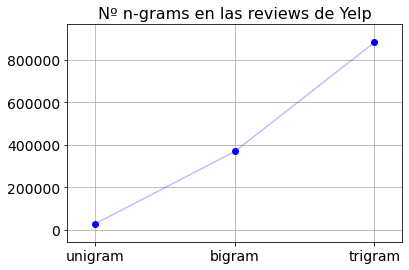

In [177]:
# Nos creamos una lista para la representación en nase a las longitudes que hemos sacado anteriormente:
counts = [len_ngram_1, len_ngram_2, len_ngram_3]
plt.plot(counts, color='b', alpha=0.25)
plt.plot(counts, 'bo')
plt.margins(0.1)
plt.xticks(range(3), ['unigram', 'bigram', 'trigram'])
plt.tick_params(labelsize=14)
plt.title('Nº n-grams en las reviews de Yelp', {'fontsize':16})
plt.grid()
plt.show()

## Limpiando nuestras features

Al igual que en las numéricas, como podría ser la medida de algún experimento, es posible que se nos cuele algo de ruido en nuestros datos. Pero en el caso de estar trabajando con palabras, ¿cómo separamos limpiamente la señal del ruido? La respuesta es sencilla, a través del filtrado, ya que nos permitirá que técnicas basadas en la tokenización (sobre los datos sin procesar) y el conteo (para generar listas de palabras simples o n-gramas) se vuelvan más utilizables. La detección de frases, que discutiremos a continuación, puede verse como un filtro de bigrama particular.

A continuación, se recogen algunas formas más de realizar este filtrado.


### Stopwords

Tanto la clasificación como la recuperación de textos no suelen requerir una comprensión profunda del texto. Por ejemplo, en la oración "Emma knocked on the door", las palabras "on" y "the" no cambian el hecho de que esta oración trata sobre una persona y una puerta. Para tareas de grano grueso como la clasificación, los pronombres, artículos y preposiciones pueden no agregar mucho valor. Estas palabras que no paortan valor se denominan _stopwords_. Cabe destacar que el caso puede ser muy diferente en el análisis de sentimientos, que requiere un conocimiento detallado de la semántica, por lo que sí le estarían aportando información.


El popular paquete Python de Procesamiento de Lenguaje Natural (NLP, del inglés Natural Langauge Processing), llamado NLTK contiene una lista de stopwords definidas por lingüistas para muchos idiomas. (Para esto necesitaremos instalar NLTK y ejecutar ``nltk.download()`` del lenguaje que vayamos a usar para obtener todas las ventajas). También se pueden encontrar varias listas de stopwords en Internet.

Por ejemplo, a continuación se muestran algunas palabras de muestra de la lista de stopwords en inglés:

In [472]:
# Importamos la librería nltk para procesamiento de lenguaje natural
import nltk
# Importamos las stopwords
from nltk.corpus import stopwords
# Nos desacargamos la información:
nltk.download('stopwords')
# Leemos la primeras 10 stopwords del idioma inglés:
stopwords.words('english')[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TheBridge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Fíjate que la lista contiene apóstrofos y las palabras no están en mayúscula. Para usarlo tal como está, el proceso de tokenización no debe comerse apóstrofos y las palabras deben convertirse a minúsculas.

Por otra parte, también podríamos obtener las stopowords del castellano si cambiamos el parámetro:

In [473]:
stopwords.words('spanish')[:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

## Filtrado basado en la frecuencia

Las listas de palabras irrelevantes son una forma de eliminar las palabras comunes que generan características vacías. Hay otras formas más estadísticas de llegar al concepto de "palabras comunes". Existen métodos que dependen de definiciones manuales y otros que se basan en estadísticas. La misma idea se aplica al filtrado de palabras. Aquí también podemos usar estadísticas de frecuencia.


### Palabras frecuentes

Las estadísticas de frecuencia son excelentes para filtrar palabras comunes específicas del corpus (el vocabulario, nuestro espacio de palabras), así como palabras vacías de propósito general. Por ejemplo, la frase "New York Times" y cada una de las palabras individuales que contiene aparecen con frecuencia en el conjunto de datos de todos los artículos del New York Times (New York Times Annotated Corpus). De manera similar, la palabra "house" aparece a menudo en la frase "House of Commons" en el corpus de los debates del parlamento canadiense, un conjunto de datos que se usa popularmente para la traducción automática estadística porque contiene una versión en inglés y otra en francés de todos los documentos. Estas palabras son significativas en general, pero no dentro de esos corpus particulares. Una lista típica de stopwords capturará las stopwords generales, pero no las específicas del corpus.

Observar las palabras más frecuentes puede revelar problemas de análisis y resaltar palabras normalmente útiles que aparecen demasiadas veces en el corpus. Por ejemplo, la siguiente imagen muestra una tabla que enumera las 40 palabras más frecuentes en el conjunto completo de datos de reseñas de Yelp (aquí estamos con una versión muy reducida de 10 mil registros para poder realizar los ejemplos sin problemas de rendimiento).

En este caso, la frecuencia se basa en la cantidad de documentos (reseñas) en los que aparecen, no en su recuento dentro de un documento. Como podemos ver, la lista incluye muchas stopwords. También contiene algunas sorpresas: "s" y "t" están en la lista porque usamos el apóstrofe como un delimitador de tokenización, y palabras como "Mary’s" o "didn’t" se analizaron como "Mary s" y "didn t". Además, las palabras "good", "food" y "great" aparecen cada una en alrededor de un tercio de las reseñas, pero es posible que deseemos mantenerlas porque son muy útiles para tareas como el análisis de sentimientos o la categorización empresarial.

<img src="../../imagenes/imagen6.png">

En la práctica, es útil combinar el filtrado basado en frecuencia con una lista de stopwords. También está la delicada cuestión de dónde colocar el límite. Desafortunadamente, no existe una respuesta universal. La mayoría de las veces, el límite debe determinarse manualmente, a base de prubea y error, y es posible que deba volver a examinarse cuando cambie el conjunto de datos.


### Palabras raras

Dependiendo del caso de uso, también es posible que debamos filtrar las palabras raras. Estas pueden ser palabras que realmente no se suelen usar o errores ortográficos de palabras comunes. Para un modelo estadístico, una palabra que aparece en solo uno o dos documentos es más ruido que información útil. Por ejemplo, supongamos que la tarea consiste en clasificar las empresas en función de sus reseñas de Yelp, y una sola reseña contiene la palabra "gobbledygook". ¿Cómo se puede saber, basándose en esta palabra, si el negocio es un restaurante, un salón de belleza o un bar? Incluso en el caso que conociéramos el negocio al que hace referencia la reseña completa, que en este caso era un bar, probablemente sería un error clasificarlo como tal para otras reseñas que contengan la palabra "gobbledygook".

Las palabras raras no solo son poco fiables como predictores, sino que también generan un coste computacional extra. El conjunto de 1,6 millones de reseñas de Yelp contiene 357.481 palabras únicas (tokenizadas por espacios y caracteres de puntuación), de las cuales 189.915 aparecen en una sola reseña y 41,162 en dos reseñas. Más del 60% del vocabulario ocurre raramente. Esta es la denominada distribución de cola pesada y es muy común en los datos del mundo real. El tiempo de entrenamiento de muchos modelos estadísticos de aprendizaje automático se escala linealmente con el número de características o varaibles (que en este caso serán las palabras únicas), y algunos modelos crecen de forma cuadrática con ellas, o incluso peor. Por lo tanto, nos interesará eliminar las palabras raras ya que implican un gran costo de cálculo y almacenamiento a cambio de no mucha ganancia adicional.

Las palabras raras se pueden identificar y recortar fácilmente según las estadísticas de recuento de palabras. Alternativamente, sus recuentos se pueden agregar a un contenedor de basura especial, que puede servir como una característica adicional. La siguiente figura muestra esta representación en un documento corto que contiene un montón de palabras habituales y dos palabras raras, "gobbledygook" y "zylophant". Las palabras habituales conservan sus propios recuentos, que se pueden filtrar aún más mediante listas de stopwords u otros métodos basados en las frecuencias. Las palabras raras pierden su identidad y se agrupan en una nueva característica denominada ``GARBAGE``.

<img src="../../imagenes/imagen7.png">


Dado que uno no sabrá qué palabras son raras hasta que se haya contado todo el corpus, la función del contenedor de basura deberá recopilarse como un paso posterior al procesamiento inicial.

Si un documento de texto es muy corto, es probable que no contenga información útil y no debería utilizarse al entrenar un modelo. Sin embargo, hay que tener cuidado al aplicar esta regla. El volcado de Wikipedia contiene muchas páginas que son apéndices incompletos, que probablemente sean seguros para filtrar. Los tweets, por otro lado, son intrínsecamente cortos y requieren otros trucos de caracterización y modelado.


### EJERCICIO

Al igual que hemos hecho antes con el contador de palabras, diseña una función que implemente el contador de palabras con el acumulador de basura. Te puedes basar el la función que has creado antes, ya que la mayor parte de la funcionalidad es compartida entre ambas funciones.

A diferencia de antes, ahora necesitaremos la lista de todos los textos que están en el DataFrame para extraer la información sobre las palabras raras. Para simplificarlo todo, supongamos que lo que nos pasan en este parámetro es la columna 'text', es decir, un Series de strings. Por lo tanto, los parámetros de entrada de nuestra función serán:
  - texto: al igual que antes, el texto que convertir a un vector de apariciones
  - col: columna del DataFrame donde están todos los textos
  - umbral: número de 0 a 100 que nos indicará el máximo porcentaje de apariciones de una palabra en todos los textos para ser considerada rara. Por defecto, hacer que valga 0.01 (1 palabra de cada 10.000).
  
La función debera, por tanto, hacer lo siguiente:
1. Leer la columna de textos y sacar el conteo de cada palabra en el total. Para ello, podrías hacer varias cosas, como:
    - Concatenar todos los textos en 1 solo y hacerle el conteo de palabras
    - Hacer el conteo de palabras para cada fila de la columna de textos, y luego sumar los diccionarios
    - Otra que se te ocurra
2. Sacar las palabras GARBAGE, para lo que tendrás que, una vez tengas el conteo, sumar todas las apariciones para sacar el total de palabras que tiene el texto, y sacar el porcentaje particular de cada palabra. Luego, si es menor que el porcentaje umbral, será considerada GARBAGE. Si no, no. (Puede que sea mejor hacerlo con Series de Pandas).
3. Hacer el conteo de texto
4. Convertir el diccionario a Series
5. Hacer el mapeo de las palabras GARBAGE dentro del conteo
6. agrupar por palabra y sumar para que garbage obtenga lo suyo

In [504]:
palabras = analiza_texto(' '.join(df['text'].iloc[:50].values))


In [505]:
palabras = pd.Series(palabras)

{'My': 7,
 'wife': 3,
 'took': 5,
 'me': 27,
 'here': 24,
 'on': 49,
 'my': 49,
 'birthday': 1,
 'for': 77,
 'breakfast': 2,
 'and': 245,
 'it': 62,
 'was': 113,
 'excellent': 6,
 '': 192,
 'The': 59,
 'weather': 1,
 'perfect': 3,
 'which': 8,
 'made': 8,
 'sitting': 3,
 'outside': 6,
 'overlooking': 1,
 'their': 25,
 'grounds': 1,
 'an': 13,
 'absolute': 1,
 'pleasure': 1,
 'Our': 2,
 'waitress': 3,
 'our': 14,
 'food': 20,
 'arrived': 3,
 'quickly': 4,
 'the': 277,
 'semibusy': 1,
 'Saturday': 2,
 'morning': 3,
 'It': 20,
 'looked': 3,
 'like': 16,
 'place': 30,
 'fills': 1,
 'up': 17,
 'pretty': 11,
 'so': 22,
 'earlier': 3,
 'you': 38,
 'get': 19,
 'betterDo': 1,
 'yourself': 2,
 'a': 157,
 'favor': 1,
 'Bloody': 1,
 'Mary': 1,
 'phenomenal': 1,
 'simply': 2,
 'best': 9,
 'Ive': 7,
 'ever': 4,
 'had': 38,
 'Im': 13,
 'sure': 3,
 'they': 37,
 'only': 9,
 'use': 1,
 'ingredients': 1,
 'from': 16,
 'garden': 1,
 'blend': 1,
 'them': 20,
 'fresh': 8,
 'when': 13,
 'order': 5,
 'amazing

In [235]:
conteo_palabras_raras(
    text = 'I have a snake in my boot',
    col = df['text'],
    umbral = 0.01)

{'GARBAGE': 2, 'I': 1, 'a': 1, 'have': 1, 'in': 1, 'my': 1}

## Stemming

Un problema del análisis simple que estamos viendo es que las diferentes variaciones de la misma palabra se cuentan como palabras separadas. Por ejemplo, "flor" y "flores" son símbolos técnicamente diferentes, y también lo son las palabras en inglés "swimmer", "swimming" y "swim", aunque tienen un significado muy parecido. Sería bueno si todas estas variaciones diferentes se asignaran a la misma palabra.

Stemming es una técnica de NLP que intenta reducir cada palabra a su fomra más básica, su raíz. Existen diferentes enfoques. Algunos se basan en reglas lingüísticas, otros en estadísticas observadas. Una subclase de algoritmos incorpora el etiquetado de palabras y las reglas lingüísticas en un proceso conocido como lematización.

La mayoría de las herramientas de stemming se centran en el idioma inglés, aunque se están realizando esfuerzos para otros idiomas, por lo que seguiremos con nuestros ejemplos en inglés. El lematizador Porter es la herramienta de lematización gratuita más utilizada para este idioma. El programa original está escrito en ANSI C, pero muchos otros paquetes implemntan un wrapper para proporcionar acceso a otros lenguajes.

A continuación, se muestra un ejemplo de ejecución del lematizador Porter a través del paquete NLTK de Python. Como se puede observar, manejamos una gran cantidad de casos, pero no es perfecto. La palabra "goes" se asigna a "goe", mientras que "go" se asigna a sí misma:


<!-- <img src="../../imagenes/imagen8.png"> -->

In [506]:
import nltk

stemmer = nltk.stem.porter.PorterStemmer()
print(f"flowers -> {stemmer.stem('flowers')}")
print(f"zeroes -> {stemmer.stem('zeroes')}")
print(f"stemmer -> {stemmer.stem('stemmer')}")
print(f"sixties -> {stemmer.stem('sixties')}")
print(f"sixty -> {stemmer.stem('sixty')}")
print(f"goes -> {stemmer.stem('goes')}")
print(f"go -> {stemmer.stem('go')}")

flowers -> flower
zeroes -> zero
stemmer -> stemmer
sixties -> sixti
sixty -> sixti
goes -> goe
go -> go


### EJERCICIO

Crea una función que compare el significado de 2 palabras basándose en el stemmer y diga si tienen la misma raíz o no. Compruébalo con las palabras:
  - "saltar" vs "salto"
  - "cantar" vs "canto"
  - "azul" vs "rojo"
  
Para ello, tendrás que usar un stemmer diferente, el SnowballStemmer, que puede ser utilziado para castellano, y el cual se utiliza como sigue:

In [517]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

stemmer.stem("salto")

'salt'

In [529]:
def raiz(palabra1, palabra2):
    stemmer = SnowballStemmer('spanish')
    
    raiz1 = stemmer.stem(palabra1)
    raiz2 = stemmer.stem(palabra2)
    
    if raiz1 == raiz2:
        return f"Su raíz {raiz1} es la misma"
    else:
        return f"La raíz {raiz1} es diferente a {raiz2}"
        
sol = raiz("cantando", "cantaré")

In [530]:
sol

'Su raíz cant es la misma'

Stemming tiene un costo de cálculo que hay que tener en cuenta. Si el beneficio final supera el costo o no, dependerá básicamente de la aplicación que se le vaya a dar. También vale la pena señalar que la reducción podría suponer un empeoramiento del sistema total en lugar de mejorar el rendimiento. Las palabras "new" y "news" tienen significados muy diferentes, pero ambas se derivarían de "new". Abundan los ejemplos similares. Por esta razón, no siempre se utiliza la derivación.


## Átomos del significado: Palabras -> N-Grams -> Frases

El concepto de _bag-of-words_ es sencillo. Pero, ¿cómo sabe una computadora qué es una palabra? Un documento de texto se representa digitalmente como una cadena, que es básicamente una secuencia de caracteres. También se puede encontrar texto semiestructurado en forma de JSON blobs o páginas HTML. Pero incluso con las etiquetas y la estructura agregadas, la unidad básica sigue siendo una cadena. ¿Cómo se convierte una cadena en una secuencia de palabras? Esto involucra las tareas de análisis y tokenización, que discutiremos a continuación.


### _Parsing_ y Tokenización

El _parsing_ es necesario cuando la cadena de texto contiene algo más que texto plano. Por ejemplo, si los datos sin procesar son una página web, un correo electrónico o un registro de algún tipo, entonces contienen alguna estructura adicional. Es necesario decidir cómo manejar el marcado, los encabezados y pies de página, o las secciones del log que no aporten información. Si el documento es una página web, el analizador debe manejar las URL. Si se trata de un correo electrónico, los campos como "De", "Para" y "Asunto" pueden requerir un manejo especial; de lo contrario, estos encabezados terminarán como palabras normales en el recuento final, que no es lo que queremos.

Después de un parsing ligero, la parte de texto plano del documento puede pasar por la tokenización. Esto convierte la cadena (una secuencia de caracteres) en una secuencia de tokens. Cada uno de estos tokens se puede contar como una palabra. El tokenizador necesita saber qué caracteres indican que un token ha finalizado y otro está comenzando. Los caracteres de espacio suelen ser buenos separadores, al igual que los caracteres de puntuación. Si el texto contiene tweets, habrá que tener cuidado con las marcas e los hashtags (#), que no deben usarse como separadores (también conocidos como delimitadores).

A veces, el análisis debe ser realizado a partir de frases u oraciones en vez de utilizar el documento completo. Por ejemplo, los n-gramas, una generalización del concepto de palabra, no debe extenderse más allá de los límites de las oraciones. Los métodos de caracterización de texto más complejos como ``word2vec`` también funcionan con frases u oraciones. En estos casos, primero es necesario analizar el documento en oraciones y luego convertir cada oración en palabras.

Al hacer el ``split()`` de una cadena de texto también estamos haciendo una tokenización, pero como veremos, la función ``tokenize()`` nos aporta muchas más [ventajas](https://www.tothenew.com/blog/groovy-tokenize-vs-split/#:~:text=tokenize()%20%2Cwhich%20returns%20a,split()%20keeps%20such%20string.&text=The%20split()%20can%20take,where%20as%20tokenize%20does%20not.)


### Collocation Extraction para la detección de frases

Una secuencia de tokens produce una lista de palabras y n-gramas. Sin embargo, hablando semánticamente, estamos acostumbrados a comprender frases, no n-gramas. En el procesamiento de lenguaje natural (NLP), el concepto de una frase útil se llama ``collocation``. En palabras de Manning y Schütze (1999: 151), "Una collocation es una expresión que consta de dos o más palabras que corresponden a alguna forma convencional de decir las cosas".

Las collocations son más significativas que la suma de sus partes. Por ejemplo, "strong tea" tiene un significado diferente más allá de "great physical strength" y "tea"; por lo tanto, se considera una collocation. La frase "cute puppy", por otro lado, significa exactamente la suma de sus partes: "cute" y "puppy". Por tanto, no se considera una collocation.

Las collocations no tienen que ser secuencias consecutivas. Por ejemplo, se considera que la oración "Emma knocked on the door" contiene la colocación "knock door". Por tanto, no todas las collocations son n-gramas. Por el contrario, no todos los n-gramas se consideran una collocation significativa.

Debido a que las collocations son más que la suma de sus partes, su significado no puede ser capturado adecuadamente por conteos de palabras individuales. La bag-of-words se queda corta como representación. La bag-of-n-grams- también es problemática ya que captura demasiadas secuencias sin sentido (considera "this is" en el ejemplo de la bolsa de n-gramas) y no suficientes de las significativas (como "knock door).

Las collocations son útiles como características. Pero, ¿cómo se descubren y se extraen del texto? Una forma es predefinirlos. Si nos esforzáramos mucho, probablemente podríamos encontrar listas completas de modismos en varios idiomas, y podríamos buscar en el texto cualquier coincidencia. Sería muy caro, pero funcionaría. Si el corpus es muy específico de un dominio y contiene jerga propia del mismo, este podría ser el método preferido. Pero la lista requeriría una gran cantidad de curación manual y tendría que actualizarse constantemente para los corpus en evolución. Por ejemplo, probablemente no sería muy realista para analizar tweets, blogs o artículos.

Desde la llegada del NLP estadístico hace 2 décadas, la gente ha optado cada vez más por métodos estadísticos para encontrar frases. En lugar de establecer una lista fija de frases y refranes idiomáticos, los métodos de extracción de Collocation Extraction se basan en los datos en constante evolución para revelar los dichos populares del día.


### Métodos basados en frecuencias

Un truco simple es mirar los n-gramas que ocurren con mayor frecuencia. El problema con este enfoque es que los que ocurren con más frecuencia pueden no ser los más útiles. La siguiente tabla muestra los bigramas más populares (n = 2) en todo el conjunto de datos de reseñas de Yelp (el de 1,6 millones de registros, no nuestra muestra de 10 mil). Como podemos ver, los 10 bigramas más frecuentes por recuento de documentos son términos muy genéricos que no contienen mucho significado.


<img src="../../imagenes/imagen9.png">


### Chunking y etiquetado de parte del texto (part-of-speech)


Chunking es un poco más sofisticado que encontrar n-gramas, ya que forma secuencias de tokens basadas en partes del texto, utilizando modelos basados en reglas.

Por ejemplo, podríamos estar más interesados en encontrar todas las frases nominales en un problema donde la entidad (en este caso, el tema de un texto) es la más interesante para nosotros. Para encontrar esto, tokenizamos cada palabra con una parte del texto y luego examinamos las posiciones vecinas del token para buscar agrupaciones de partes de texto, o "chunks". Los modelos que asignan palabras a partes del habla generalmente son específicos del idioma. Varias bibliotecas de Python de código abierto, como NLTK, spaCy y TextBlob, tienen varios modelos de lenguaje disponibles.

Para ilustrar cómo varias bibliotecas en Python hacen que la fragmentación (chunking) mediante el etiquetado de part-of-speech sea bastante sencilla, usemos nuevamente el conjunto de datos de reseñas de Yelp. En el siguiente ejemplo, evaluamos las partes de la oración para encontrar las frases nominales usando spaCy y TextBlob.

In [468]:
df = pd.read_csv("yelp_academic_dataset_review.csv")
df

,user_id,review_id,stars,date,text,type,business_id,funny,useful,cool
0,rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg,0,5,2
1,0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow,0,0,0
2,0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA,0,1,0
3,uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg,0,2,1
4,vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,_eqQoPtQ3e3UxLE4faT6ow,Ubyfp2RSDYW0g7Mbr8N3iA,3,2012-07-28,First visit...Had lunch here today - used my G...,review,VY_tvNUCCXGXQeSvJl757Q,0,2,1
9996,ROru4uk5SaYc3rg8IU7SQw,2XyIOQKbVFb6uXQdJ0RzlQ,4,2012-01-18,Should be called house of deliciousness!\n\nI ...,review,EKzMHI1tip8rC1-ZAy64yg,0,0,0
9997,gGbN1aKQHMgfQZkqlsuwzg,jyznYkIbpqVmlsZxSDSypA,4,2010-11-16,I recently visited Olive and Ivy for business ...,review,53YGfwmbW73JhFiemNeyzQ,0,0,0
9998,0lyVoNazXa20WzUyZPLaQQ,5UKq9WQE1qQbJ0DJbc-B6Q,2,2012-12-02,My nephew just moved to Scottsdale recently so...,review,9SKdOoDHcFoxK5ZtsgHJoA,0,0,0


### Usando spaCy: 

Para usar spaCy tendremos que realizar su [instalación](https://spacy.io/docs/usage/) previa. En este caso, debería bastar con descomentar y ejecutar las siguientes celdas:

In [469]:
# !pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [266]:
# !python -m spacy validate


| Loading compatibility table...
/ Loading compatibility table...
- Loading compatibility table...
\ Loading compatibility table...
| Loading compatibility table...
[+] Loaded compatibility table

====================== Installed models (spaCy v2.3.5) ======================
[i] spaCy installation: C:\Users\TheBridge\anaconda3\lib\site-packages\spacy

TYPE      NAME             MODEL            VERSION            
package   en-core-web-sm   en_core_web_sm   2.2.0     --> 2.3.1


============================== Install updates ==============================
Use the following commands to update the model packages:
python -m spacy download en_core_web_sm



In [267]:
# !python -m spacy download en_core_web_sm

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047114 sha256=539469e2846ea14a9a802d45b691e71a2febc16c6e5584201147e7d133202e97
  Stored in directory: C:\Users\TheBridge\AppData\Local\Temp\pip-ephem-wheel-cache-77y7v1dv\wheels\ee\4d\f7\563214122be1540b5f9197b52cb3ddb9c4a8070808b22d5a84
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


Si todo ha ido correctamente, podremos importar la librería y empezar a trabajar con ella, como pone su [documentación]()

In [539]:
import spacy

In [540]:
nlp = spacy.load('en_core_web_sm')

In [541]:
# model meta data
spacy.info('en_core_web_sm')


===================== Info about model 'en_core_web_sm' =====================

lang             en                            
name             core_web_sm                   
license          MIT                           
author           Explosion                     
url              https://explosion.ai          
email            contact@explosion.ai          
description      English multi-task CNN trained on OntoNotes. Assigns context-specific token vectors, POS tags, dependency parse and named entities.
sources          [{'name': 'OntoNotes 5', 'url': 'https://catalog.ldc.upenn.edu/LDC2013T19', 'license': 'commercial (licensed by Explosion)'}]
pipeline         ['tagger', 'parser', 'ner']   
version          2.3.1                         
spacy_version    >=2.3.0,<2.4.0                
parent_package   spacy                         
labels           {'tagger': ['$', "''", ',', '-LRB-', '-RRB-', '.', ':', 'ADD', 'AFX', 'CC', 'CD', 'DT', 'EX', 'FW', 'HYPH', 'IN', 'JJ', 'JJR', 'JJS

{'lang': 'en',
 'name': 'core_web_sm',
 'license': 'MIT',
 'author': 'Explosion',
 'url': 'https://explosion.ai',
 'email': 'contact@explosion.ai',
 'description': 'English multi-task CNN trained on OntoNotes. Assigns context-specific token vectors, POS tags, dependency parse and named entities.',
 'sources': [{'name': 'OntoNotes 5',
   'url': 'https://catalog.ldc.upenn.edu/LDC2013T19',
   'license': 'commercial (licensed by Explosion)'}],
 'pipeline': ['tagger', 'parser', 'ner'],
 'version': '2.3.1',
 'spacy_version': '>=2.3.0,<2.4.0',
 'parent_package': 'spacy',
 'accuracy': {'las': 89.7572754092,
  'uas': 91.6570115569,
  'token_acc': 99.756964111,
  'las_per_type': {'advmod': {'p': 85.6065101297,
    'r': 84.9512113055,
    'f': 85.2776018577},
   'aux': {'p': 97.9464841319, 'r': 98.0772654442, 'f': 98.0118311613},
   'nsubj': {'p': 95.530627567, 'r': 94.7522887555, 'f': 95.1398662913},
   'root': {'p': 89.5162856958, 'r': 91.1692936754, 'f': 90.3352283866},
   'compound': {'p': 90

In [547]:
def f(x):
    return x[0]

df['text'].apply(f)

0       M
1       I
2       l
3       R
4       G
       ..
9995    F
9996    S
9997    I
9998    M
9999    4
Name: text, Length: 10000, dtype: object

In [551]:
type(df['text'][0])

str

In [572]:
doc_df[0][2].text

'took'

In [542]:
# Keeping it in a pandas dataframe
doc_df = df['text'].apply(nlp)

type(doc_df)

pandas.core.series.Series

In [543]:
type(doc_df[0])

spacy.tokens.doc.Doc

In [545]:
doc_df[3]

Rosie, Dakota, and I LOVE Chaparral Dog Park!!! It's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballparks, and a lake with ducks.

The Scottsdale Park and Rec Dept. does a wonderful job of keeping the park clean and shaded.  You can find trash cans and poopy-pick up mitts located all over the park and paths.

The fenced in area is huge to let the dogs run, play, and sniff!

Este objeto nos viene muy bien por lo que nos permite hacer con él, que nos detallará, en función de sus atributos:
  - ``text``: string con la partícula de texto en sí
  - ``pos_``: análisis sintáctico a primer nivel de esa palabra (sustantivo, adjetivo, determinante...)
  - ``tag_``: complemento a ``pos_``, detalla con mayor precisión el análisis de la palabra

Para más detalle de cómo interpretar los resultados, accede a este [enlace](https://ashutoshtripathi.com/2020/04/13/parts-of-speech-tagging-and-dependency-parsing-using-spacy-nlp/#Fine-grained-Part-of-speech-Tags)

In [573]:
for doc in doc_df[4]:
    print(doc.text, doc.pos_, doc.tag_)

General PROPN NNP
Manager PROPN NNP
Scott PROPN NNP
Petello PROPN NNP
is AUX VBZ
a DET DT
good ADJ JJ
egg NOUN NN
! PUNCT .
! PUNCT .
! PUNCT .
Not PART RB
to PART TO
go VERB VB
into ADP IN
detail NOUN NN
, PUNCT ,
but CCONJ CC
let VERB VB
me PRON PRP
assure VERB VB
you PRON PRP
if SCONJ IN
you PRON PRP
have AUX VBP
any DET DT
issues NOUN NNS
( PUNCT -LRB-
albeit SCONJ IN
rare ADJ JJ
) PUNCT -RRB-
speak VERB VBP
with ADP IN
Scott PROPN NNP
and CCONJ CC
treat VERB VB
the DET DT
guy NOUN NN
with ADP IN
some DET DT
respect NOUN NN
as SCONJ IN
you PRON PRP
state VERB VBP
your DET PRP$
case NOUN NN
and CCONJ CC
I PRON PRP
'd VERB MD
be AUX VB
surprised ADJ JJ
if SCONJ IN
you PRON PRP
do AUX VBP
n't PART RB
walk VERB VB
out ADP RP
totally ADV RB
satisfied ADJ JJ
as SCONJ IN
I PRON PRP
just ADV RB
did AUX VBD
. PUNCT .
Like INTJ UH
I PRON PRP
always ADV RB
say VERB VBP
..... PUNCT NFP
" PUNCT ``
Mistakes NOUN NNS
are AUX VBP
inevitable ADJ JJ
, PUNCT ,
it PRON PRP
's AUX VBZ
how ADV WRB
we PR

O si queremos consultarlo directamente con la propia librería, podemos usar la función ``spacy.explain()``:

In [296]:
spacy.explain('NNP')

'noun, proper singular'

Además, ``spaCy`` también se encargará por nosotros de trocear los textos en función del elemento que nosotros le digamos, como sacar los sustantivos:

In [576]:
# spaCy also does noun chunking for us

print([chunk for chunk in doc_df[4].noun_chunks])

[General Manager Scott Petello, a good egg, detail, me, you, you, any issues, Scott, the guy, some respect, you, your case, I, you, I, I, Mistakes, it, we, them, Thanks, Scott, his awesome staff, You, a customer, life, :^]


Por si fuera poco, también tenemos un objeto para visualizar las relaciones entre palabras que nos haya detectado, explicado con más detalle en la [documentación](https://spacy.io/usage/visualizers):

_NOTA: Con el visualizador, el kernel se queda trabajando de continuo hasta que le demos al botón de stop de la barra de ayuda de arriba del todo)._

In [306]:
from spacy import displacy
displacy.serve(doc_df[4], style="dep")


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


### Usando Textblob:

Por otra parte, también tenemos ``TextBlob``, que nos permitirá cosas parecidas, tal como muestra en su [documentación](https://textblob.readthedocs.io/en/dev/)

In [577]:
!pip install textblob

^C


In [578]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TheBridge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\TheBridge\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [579]:
from textblob import TextBlob

El mecanismo de etiquetado por defecto de TextBlob utiliza PatternTagger, lo cual es bueno para nuestro ejemplo. Para usar el NLTK tagger, podemos especificar el  pos_tagger cuando llamamos a TextBlob. Más detalle de estas acciones avanzadas en su [documentación avanzada](http://textblob.readthedocs.io/en/dev/advanced_usage.html#advanced).

In [581]:
blob_df = review_df['text'].iloc[:100].apply(TextBlob)
type(blob_df)

pandas.core.series.Series

In [582]:
type(blob_df[4])

textblob.blob.TextBlob

In [583]:
blob_df[4].tags

[('General', 'NNP'),
 ('Manager', 'NNP'),
 ('Scott', 'NNP'),
 ('Petello', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('egg', 'NN'),
 ('Not', 'RB'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('into', 'IN'),
 ('detail', 'NN'),
 ('but', 'CC'),
 ('let', 'VB'),
 ('me', 'PRP'),
 ('assure', 'VB'),
 ('you', 'PRP'),
 ('if', 'IN'),
 ('you', 'PRP'),
 ('have', 'VBP'),
 ('any', 'DT'),
 ('issues', 'NNS'),
 ('albeit', 'IN'),
 ('rare', 'NN'),
 ('speak', 'NN'),
 ('with', 'IN'),
 ('Scott', 'NNP'),
 ('and', 'CC'),
 ('treat', 'VB'),
 ('the', 'DT'),
 ('guy', 'NN'),
 ('with', 'IN'),
 ('some', 'DT'),
 ('respect', 'NN'),
 ('as', 'IN'),
 ('you', 'PRP'),
 ('state', 'NN'),
 ('your', 'PRP$'),
 ('case', 'NN'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ("'d", 'MD'),
 ('be', 'VB'),
 ('surprised', 'VBN'),
 ('if', 'IN'),
 ('you', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('walk', 'VB'),
 ('out', 'RP'),
 ('totally', 'RB'),
 ('satisfied', 'JJ'),
 ('as', 'IN'),
 ('I', 'PRP'),
 ('just', 'RB'),
 ('did', 'VBD'),
 ('Like', 'IN'),
 ('

Pero no solo podemos extraer los tags de un texto, sino que también podemos realizar cosas como un análisis de sentimiento, donde nos dirá, para un texto en concreto, el nivel de polaridad (de -1 (malo) a 1 (bueno)) y su objetividad (de 0 (objetivo) a 1 (subjetivo)):

In [584]:
print(blob_df[4])
blob_df[4].sentiment

General Manager Scott Petello is a good egg!!! Not to go into detail, but let me assure you if you have any issues (albeit rare) speak with Scott and treat the guy with some respect as you state your case and I'd be surprised if you don't walk out totally satisfied as I just did. Like I always say..... "Mistakes are inevitable, it's how we recover from them that is important"!!!

Thanks to Scott and his awesome staff. You've got a customer for life!! .......... :^)


Sentiment(polarity=0.468125, subjectivity=0.8100000000000002)

In [598]:
blob_df[1].sentiment

Sentiment(polarity=0.22977272727272727, subjectivity=0.6384848484848485)

In [594]:
# Si lo probamos para unos textos en particular:
texto = "Very good!"
blob_texto = TextBlob(texto)
blob_texto.sentiment

Sentiment(polarity=1.0, subjectivity=0.7800000000000001)

### EJERCICIO

1. Crea una función a la que le pasemos un string, realice el análisis de sentimiento e imprima por pantalla algo como:

```
Texto:
Aquí vendría el texto bajo análisis.

Polaridad: 0.87
Subjetividad: 0.5
```

2. Crea otra función que reciba una serie de textos y calcule la media de la polaridad y objetividad. Deberá imprimir un mensaje por pantalla como el siguiente:
```
Media de polaridad: 0.66
Media de subjetividad: 0.2
```


    A lo que deberá de añadir un mensaje que diga que los mensajes son "muy buenos" (0.8, 1], "buenos" (0.5, 0.8], "normales" [-0.5, 0.5], "malos" [-0.8, -0.5) o "muy malos" [-1, -0.8), y "muy objetivos" [0, 0.1), "objetivos" [0.1, 0.3), "no demasiado objetivos" [0.3, 0.7], "subjetivos" (0.7, 0.9], "muy subjetivos" (0.9, 1].

In [616]:
import numpy as np

lista_textos = pd.Series(["Very good!"])

In [617]:
def multiple_txt(text):
    from textblob import TextBlob
    import numpy as np
    all_polarities = []
    all_subjectivity = []
    blob_text = text.apply(TextBlob)
    for comments in blob_text:
        all_polarities.append(comments.sentiment[0])
        all_subjectivity.append(comments.sentiment[1])
    if np.mean(all_polarities) >= 0.8:
        print(f'Los mensajes son muy buenos, la media de polaridad es {np.mean(all_polarities)}')
    elif (np.mean(all_polarities) >= 0.5) and (np.mean(all_polarities) < 0.8):
        print(f'Los mensajes son buenos, la media de polaridad es {np.mean(all_polarities)}')
    elif (np.mean(all_polarities) >= -0.5) and (np.mean(all_polarities) < 0.5):
        print(f'Los mensajes son normales, la media de polaridad es {np.mean(all_polarities)}')
    elif (np.mean(all_polarities) >= -0.8) and (np.mean(all_polarities) < -0.5):
        print(f'Los mensajes son malos, la media de polaridad es {np.mean(all_polarities)}')
    elif (np.mean(all_polarities) >= -1) and (np.mean(all_polarities) < -0.8):
        print(f'Los mensajes son muy malos, la media de polaridad es {np.mean(all_polarities)}')
    if (np.mean(all_subjectivity) >= 0) and (np.mean(all_subjectivity) < 0.1):
        print(f'Los mensajes son muy objetivos, la media de subjetividad es {np.mean(all_subjectivity)}')
    elif (np.mean(all_subjectivity) >= 0.1) and (np.mean(all_subjectivity) < 0.3):
        print(f'Los mensajes son objetivos, la media de subjetividad es {np.mean(all_subjectivity)}')
    elif (np.mean(all_subjectivity) >= 0.3) and (np.mean(all_subjectivity) < 0.7):
        print(f'Los mensajes no son demasiado objetivos, la media de subjetividad es {np.mean(all_subjectivity)}')
    elif (np.mean(all_subjectivity) >= 0.7) and (np.mean(all_subjectivity) < 0.9):
        print(f'Los mensajes son subjetivos, la media de subjetividad es {np.mean(all_subjectivity)}')
    elif (np.mean(all_subjectivity) >= 0.9) and (np.mean(all_subjectivity) < 1):
        print(f'Los mensajes son muy subjetivos, la media de subjetividad es {np.mean(all_subjectivity)}')

In [618]:
multiple_txt(lista_textos)

Los mensajes son muy buenos, la media de polaridad es 1.0
Los mensajes son subjetivos, la media de subjetividad es 0.7800000000000001
